In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy as sp

import pandas as pd

from sklearn.utils import shuffle
from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn import metrics

from scipy import stats

from tqdm import tqdm

from sklearn.datasets import load_boston

from sklearn.datasets import load_iris

from sklearn.datasets import load_diabetes

from sklearn.datasets import load_wine

import pickle

from scipy.optimize import minimize

In [39]:
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

In [40]:
n = 4
k_for_meaning = 100

In [50]:
def func_1D_param_approx(m, featur, w):
    return w[0] + w[1]*np.log((w[2] ** 2)*m + 1)# + w[3] * np.sqrt(m)
#print(func_1D_param_approx(10, 0, [1,1,1,5,3])) 
def approxomation_one(SampleStep, List_mean, SampleStep_approximate, 
                      n = 4, M = None, print_progres = False, func = func_1D_param_approx, List_of_w0 = None):
    
    List_mean_approximate = []
    if List_of_w0 is None:
        List_of_w0 = []
        for i in range(len(List_mean)):
            List_of_w0.append(np.random.normal(size = n))
    if print_progres == True:
        List_mean_for = tqdm(enumerate(zip(List_mean, List_of_w0)))
    if print_progres == False:
        List_mean_for = enumerate(zip(List_mean, List_of_w0))
    List_of_w = []
    for i, (mean, w_0) in List_mean_for:
        
        if M is not None:
            X_train_phi = SampleStep[0:M]
            y_train_phi = mean[0:M]
        else:
            X_train_phi = SampleStep
            y_train_phi = mean
            
        minimum = minimize(lambda w: ((func(X_train_phi, i+1, w) - y_train_phi)**2).sum(), w_0)
        List_mean_approximate.append(func(SampleStep_approximate, i+1, minimum['x']))
        List_of_w.append(minimum['x'])
    return List_mean_approximate, List_of_w

In [55]:
def func_1D_mean_approx(m, featur, w):
    return w[0] -(w[1]**2)*np.exp(-(w[2]**2)*m)-(w[3]**2)/(m**1.5)
def approxomation_one(SampleStep, List_mean, SampleStep_approximate, 
                      n = 4, M = None, print_progres = False, func = func_1D_mean_approx, List_of_w0 = None):
    List_mean_approximate = []
    
    if List_of_w0 is None:
        List_of_w0 = []
        for i in range(len(List_mean)):
            List_of_w0.append(np.random.normal(size = n))
    
    if print_progres == True:
        List_mean_for = tqdm(enumerate(zip(List_mean, List_of_w0)))
    if print_progres == False:
        List_mean_for = enumerate(zip(List_mean, List_of_w0))

    List_of_w = []
        
    for i, (mean, w_0) in List_mean_for:
        
        if M is not None:
            X_train_phi = SampleStep[0:M]
            y_train_phi = mean[0:M]
        else:
            X_train_phi = SampleStep
            y_train_phi = mean
            
        minimum = minimize(lambda w: ((func(X_train_phi, i+1, w) - y_train_phi)**2).sum(), w_0)
        List_mean_approximate.append(func(SampleStep_approximate, i+1, minimum['x']))
        List_of_w.append(minimum['x'])
    return List_mean_approximate, List_of_w

# Boston

In [42]:
l = 26
M = 50
ordering, SampleStep, List_mean, List_std, X_train, y_train, X_test, y_test = pickle.load(open("boston5000.p", "rb"))

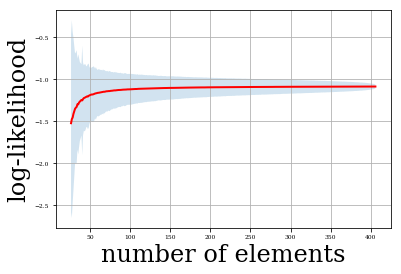

In [44]:
N = 0
mean = np.array(List_mean[N])
std = np.array(List_std[N])

plt.plot(SampleStep, mean, color = 'red')
plt.fill_between(SampleStep, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2)

plt.xlabel('number of elements')
plt.ylabel('log-likelihood')
plt.grid()

#plt.savefig("boston_real5000.pdf")
plt.savefig('BasicGraph.eps')
plt.show()


In [56]:
np.random.rand(0)

SampleStep_approximate = np.linspace(l, 500, 100, dtype=np.int64)

In [57]:
Temp_list = []

for i in tqdm(range(100)):
    List_mean_approximate, List_optimal_w = approxomation_one(SampleStep, List_mean, SampleStep_approximate, n = n, M = M - l)
    Temp_list.append(List_mean_approximate)

Temp_list = np.array(Temp_list)
    
List_mean_approximate = np.mean(Temp_list, axis = 0)
List_mean_std_for_approximate = np.std(Temp_list, axis = 0)

100%|████████████████████████████████████████| 100/100 [00:15<00:00,  6.52it/s]


In [58]:
Temp_list = []

for i in tqdm(range(100)):
    List_mean_approximate, List_optimal_w = approxomation_one(SampleStep, List_mean, SampleStep_approximate, 
                                                              func = func_1D_param_approx, n = n, M = M - l)
    Temp_list.append(List_mean_approximate)

Temp_list = np.array(Temp_list)
    
List_mean_approximate = np.mean(Temp_list, axis = 0)
#List_mean_std_for_approximate = np.std(Temp_list, axis = 0)

100%|████████████████████████████████████████| 100/100 [02:12<00:00,  1.25s/it]


NameError: name 'List_fast_approximate' is not defined

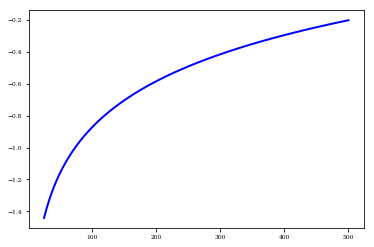

In [59]:
N = 0
mean = np.array(List_mean_approximate[N])
#std = np.array(List_std_approximate[N])

plt.plot(SampleStep_approximate, mean, color = 'blue')
#plt.fill_between(SampleStep_approximate, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2, color = 'blue')
N = 0
mean = np.array(List_fast_approximate[N])
plt.plot(SampleStep_approximate, mean, color = 'green')
mean = np.array(List_mean[N])
#std = np.array(List_std[N])

plt.plot(SampleStep, mean, color = 'red')
#plt.plot(50*np.ones(100), np.linspace(-1.3,-1.1, 100), "--", color = 'black')

plt.xlabel('number of elements')
plt.ylabel('log-likelihood')
plt.savefig('Exper1.eps')
plt.grid()

In [ ]:
def func_1D_param_approx_fast(m, featur, w):
    return w[0] - np.exp(w[1] + (-w[2]**2) * np.log(m)) - w[3]/(m+1)
Temp_list = []

for i in tqdm(range(100)):
    List_fast_approximate, List_optimal_w = approxomation_one(SampleStep, List_mean, SampleStep_approximate, 
                                                              func = func_1D_param_approx_fast, n = n, M = M - l)
    Temp_list.append(List_fast_approximate)

Temp_list = np.array(Temp_list)
    
List_fast_approximate = np.mean(Temp_list, axis = 0)